# Grisos (Descriptors SIFT)

**K de KMeans**: determina el nombre de clusters que creem quan fem el bow, per tant el nombre de paraules visuals que utilitzarem al nostre model

      K  Accuracy
0   500    0.2593
1  1000    0.2667
2  2000    0.2963
3  3000    0.2914
4  5000    0.2667

>>> Millor valor: K = 2000 amb Accuracy = 0.2963


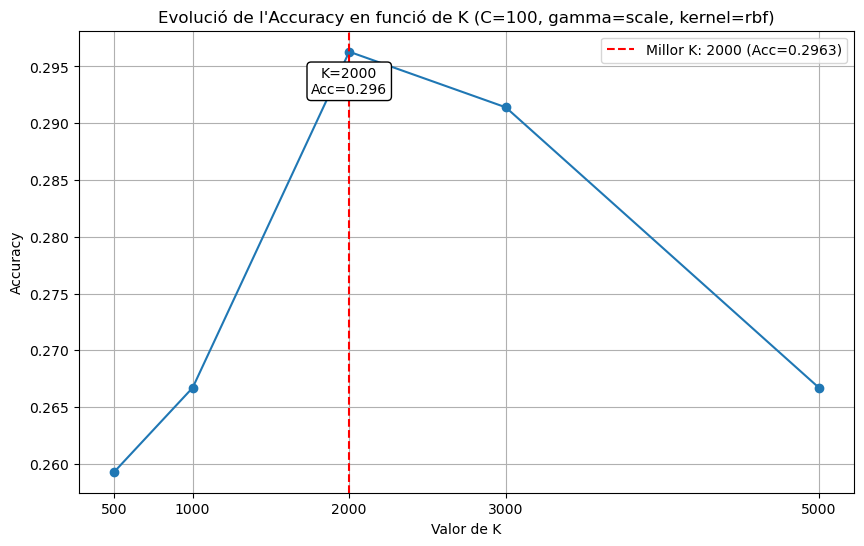

In [22]:
import re
import matplotlib.pyplot as plt
import pandas as pd

file_name = r"PROVES CORRECTES\1.GRISOS\KMEANS\VARIA_K_fixe_C100_step30_kp5.0_test0.3_gammascale_kernelrbf_degree3.txt"

# LECTURA REAL DEL FITXER EN LATIN-1
try:
    with open(file_name, "r", encoding="latin-1") as f:
        content = f.read()
except FileNotFoundError:
    print(f"Error: El fitxer '{file_name}' no s'ha trobat. Revisa el path.")
    content = ""
except UnicodeDecodeError:
    print("Error: No s'ha pogut llegir el fitxer en format Latin-1.")
    content = ""

if content:
    # Expressions regulars per extreure K i Accuracy
    k_values = re.findall(r"K=(\d+)", content)
    accuracy_values = re.findall(r"Accuracy:\s*([0-9]*\.[0-9]+)", content)

    if not k_values or not accuracy_values:
        print("No s'han trobat valors de K o Accuracy al fitxer!")
    else:
        # Conversió a números
        k_values = [int(k) for k in k_values]
        accuracy_values = [float(a) for a in accuracy_values]

        # Trobar la millor accuracy
        best_accuracy = max(accuracy_values)
        best_k = k_values[accuracy_values.index(best_accuracy)]

        # DataFrame per mostrar-ho bé
        df_results = pd.DataFrame({
            "K": k_values,
            "Accuracy": accuracy_values
        })

        print(df_results)
        print(f"\n>>> Millor valor: K = {best_k} amb Accuracy = {best_accuracy:.4f}")

        # Gràfic
        plt.figure(figsize=(10, 6))
        plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
        plt.axvline(x=best_k, color='r', linestyle='--',
                    label=f'Millor K: {best_k} (Acc={best_accuracy:.4f})')

        # Etiqueta **a sota del punt**
        plt.annotate(
            f"K={best_k}\nAcc={best_accuracy:.3f}",
            (best_k, best_accuracy),
            textcoords="offset points",
            xytext=(0, -30),  # etiqueta cap a sota del punt
            ha="center",
            fontsize=10,
            bbox=dict(boxstyle="round", fc="white")
        )

        plt.title('Evolució de l\'Accuracy en funció de K (C=100, gamma=scale, kernel=rbf)')
        plt.xlabel('Valor de K')
        plt.ylabel('Accuracy')
        plt.grid(True)
        plt.xticks(k_values)
        plt.legend()
        plt.show()


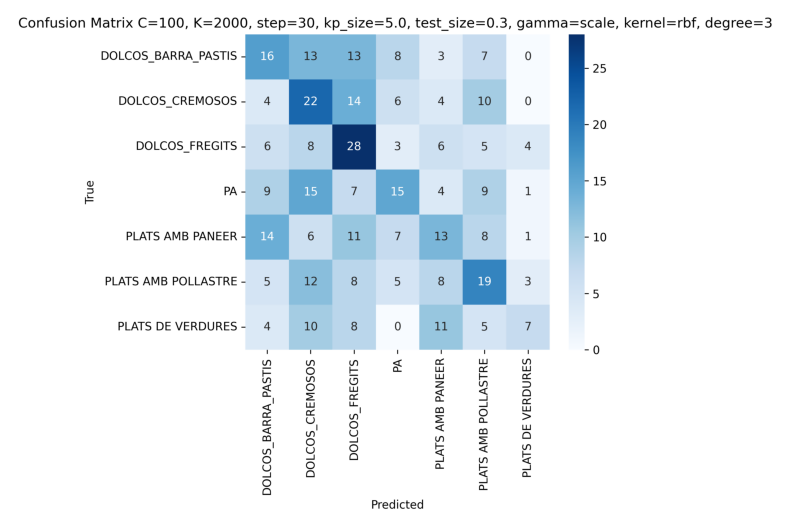

In [23]:
import matplotlib.pyplot as plt
import os


cm_file = r"PROVES CORRECTES\1.GRISOS\KMEANS\confusion_matrix_C100_K2000.png"
if os.path.exists(cm_file):
    img = plt.imread(cm_file)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print(f"No s'ha trobat la imatge de la matriu de confusió: {cm_file}")

**C de SVM:** determina la tolerància a errors del model. Un valor de $C$ alt força un marge estricte per classificar correctament gairebé tots els punts d'entrenament, augmentant el risc d'overfitting, mentre que un $C$ baix permet un marge més suau que millora la generalització.

       C  Accuracy
0      0    0.1778
1      0    0.1111
2      0    0.1778
3      0    0.1259
4      1    0.2247
5     10    0.3012
6    100    0.2963
7   1000    0.2963
8  10000    0.2963

>>> Millor valor: C = 10 amb Accuracy = 0.3012


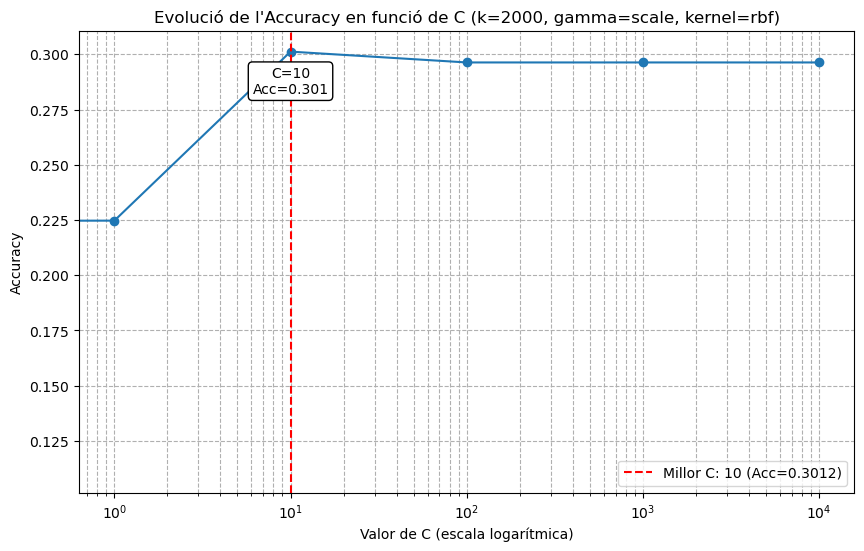

In [24]:
import re
import matplotlib.pyplot as plt
import pandas as pd

file_name = r"PROVES CORRECTES\1.GRISOS\C\VARIA_C_fixe_k2000_step30_kp5.0_test0.3_gammascale_kernelrbf_degree3.txt"

# LECTURA DEL FITXER EN LATIN-1
try:
    with open(file_name, "r", encoding="latin-1") as f:
        content = f.read()
except FileNotFoundError:
    print(f"Error: El fitxer '{file_name}' no s'ha trobat. Revisa el path.")
    content = ""
except UnicodeDecodeError:
    print("Error: No s'ha pogut llegir el fitxer en format Latin-1.")
    content = ""

if content:
    # Extreure C i Accuracy
    c_values = re.findall(r"C=([0-9]+)", content)
    accuracy_values = re.findall(r"Accuracy:\s*([0-9]*\.[0-9]+)", content)

    if not c_values or not accuracy_values:
        print("No s'han trobat valors de C o d'Accuracy al fitxer!")
    else:
        # Conversió a números
        c_values = [int(c) for c in c_values]
        accuracy_values = [float(a) for a in accuracy_values]

        # Millor Accuracy
        best_accuracy = max(accuracy_values)
        best_c = c_values[accuracy_values.index(best_accuracy)]

        # DataFrame per veure resultats
        df_results = pd.DataFrame({
            "C": c_values,
            "Accuracy": accuracy_values
        })

        print(df_results)
        print(f"\n>>> Millor valor: C = {best_c} amb Accuracy = {best_accuracy:.4f}")

        # Gràfic
        plt.figure(figsize=(10, 6))
        plt.plot(c_values, accuracy_values, marker='o', linestyle='-')
        plt.axvline(x=best_c, color='r', linestyle='--',
                    label=f'Millor C: {best_c} (Acc={best_accuracy:.4f})')

        # Escala logarítmica a l'eix X
        plt.xscale('log')

        # Etiqueta sota del millor punt
        plt.annotate(
            f"C={best_c}\nAcc={best_accuracy:.3f}",
            (best_c, best_accuracy),
            textcoords="offset points",
            xytext=(0, -30),  # etiqueta cap a sota
            ha="center",
            fontsize=10,
            bbox=dict(boxstyle="round", fc="white")
        )

        plt.title('Evolució de l\'Accuracy en funció de C (k=2000, gamma=scale, kernel=rbf)')
        plt.xlabel('Valor de C (escala logarítmica)')
        plt.ylabel('Accuracy')
        plt.grid(True, which="both", ls="--")
        plt.legend()
        plt.show()


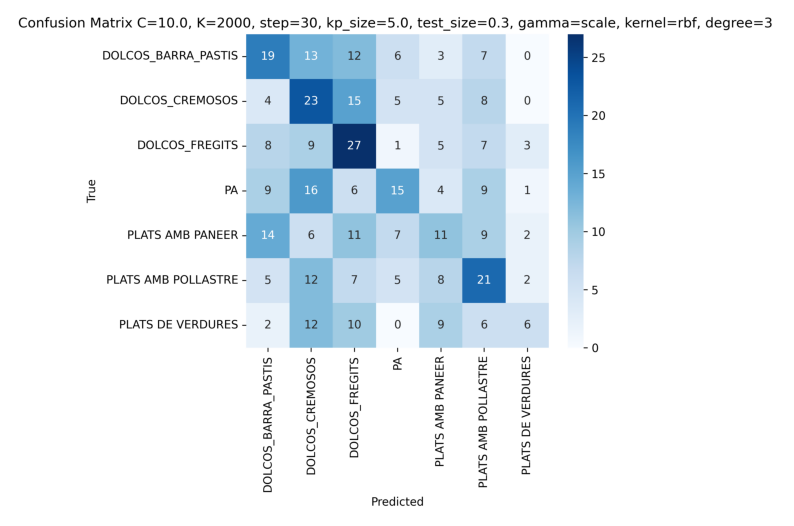

In [25]:


cm_file = r"PROVES CORRECTES\1.GRISOS\C\confusion_matrix_C10.0_K2000.png"
if os.path.exists(cm_file):
    img = plt.imread(cm_file)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print(f"No s'ha trobat la imatge de la matriu de confusió: {cm_file}")

**Steps:** determina la distància en píxels que hi ha entre els punts mostrejats, si és 10 vol dir que agafem 1 de cada 10 pixels de la imatge

   Step  Accuracy
5    10    0.3704
4    15    0.3432
0    20    0.3012
1    30    0.3012
2    40    0.2765
3    50    0.2667

>>> Millor valor: Step = 10 amb Accuracy = 0.3704


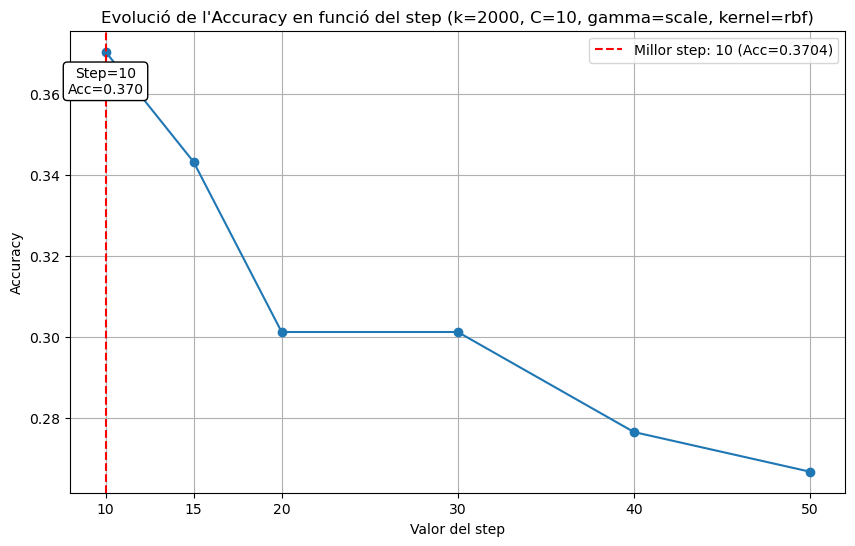

In [26]:
import re
import matplotlib.pyplot as plt
import pandas as pd

file_name = r"PROVES CORRECTES\1.GRISOS\STEPS\VARIA_STEP_fixe_k2000_c10.0_kp5.0_test0.3_gammascale_kernelrbf_degree3.txt"

# LECTURA DEL FITXER EN LATIN-1
try:
    with open(file_name, "r", encoding="latin-1") as f:
        content = f.read()
except FileNotFoundError:
    print(f"Error: El fitxer '{file_name}' no s'ha trobat. Revisa el path.")
    content = ""
except UnicodeDecodeError:
    print("Error: No s'ha pogut llegir el fitxer en format Latin-1.")
    content = ""

if content:
    # Extreure step i Accuracy
    step_values = re.findall(r"step=([0-9]+)", content)
    accuracy_values = re.findall(r"Accuracy:\s*([0-9]*\.[0-9]+)", content)

    if not step_values or not accuracy_values:
        print("No s'han trobat valors de 'step' o d'Accuracy al fitxer!")
    else:
        # Conversió a números
        step_values = [int(s) for s in step_values]
        accuracy_values = [float(a) for a in accuracy_values]

        # Crear DataFrame i ordenar-lo per Step
        df_results = pd.DataFrame({
            "Step": step_values,
            "Accuracy": accuracy_values
        }).sort_values(by="Step")

        # Extreure llistes ordenades
        step_values = df_results["Step"].tolist()
        accuracy_values = df_results["Accuracy"].tolist()

        # Millor Accuracy
        best_accuracy = max(accuracy_values)
        best_step = step_values[accuracy_values.index(best_accuracy)]

        # Mostrar DataFrame
        print(df_results)
        print(f"\n>>> Millor valor: Step = {best_step} amb Accuracy = {best_accuracy:.4f}")

        # Gràfic
        plt.figure(figsize=(10, 6))
        plt.plot(step_values, accuracy_values, marker='o', linestyle='-')
        plt.axvline(x=best_step, color='r', linestyle='--',
                    label=f'Millor step: {best_step} (Acc={best_accuracy:.4f})')

        # Etiqueta sota del millor punt
        plt.annotate(
            f"Step={best_step}\nAcc={best_accuracy:.3f}",
            (best_step, best_accuracy),
            textcoords="offset points",
            xytext=(0, -30),  # etiqueta cap a sota
            ha="center",
            fontsize=10,
            bbox=dict(boxstyle="round", fc="white")
        )

        plt.title('Evolució de l\'Accuracy en funció del step (k=2000, C=10, gamma=scale, kernel=rbf)')
        plt.xlabel('Valor del step')
        plt.ylabel('Accuracy')
        plt.grid(True)
        plt.xticks(step_values)  # ticks ordenats
        plt.legend()
        plt.show()


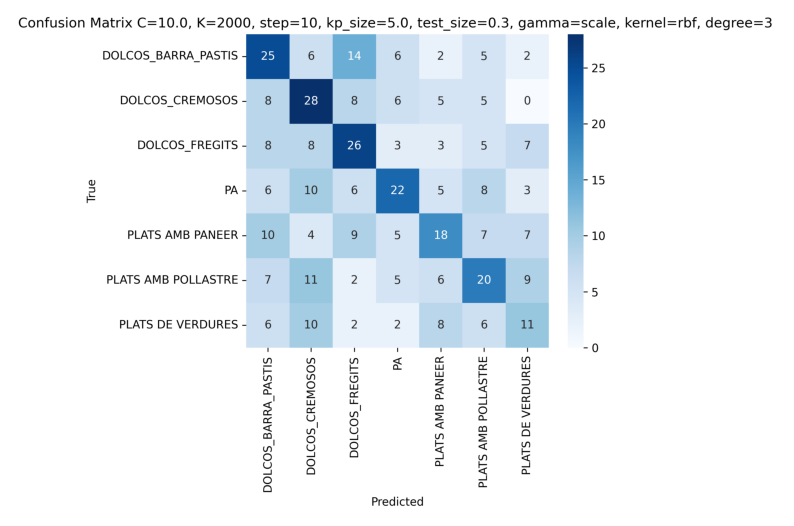

In [27]:

cm_file = r"PROVES CORRECTES\1.GRISOS\STEPS\confusion_matrix_C10.0_K2000_10.png"
if os.path.exists(cm_file):
    img = plt.imread(cm_file)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print(f"No s'ha trobat la imatge de la matriu de confusió: {cm_file}")

**KP Size:** determina la mida de la regió de la imatge centrada en cada punt clau que s'utilitza per calcular el seu descriptor 

   KP_Size  Accuracy
0        1    0.3160
4        3    0.3679
3        4    0.3580
5        5    0.3704
2        6    0.3926
1        7    0.3778

>>> Millor valor: KP_Size = 6 amb Accuracy = 0.3926


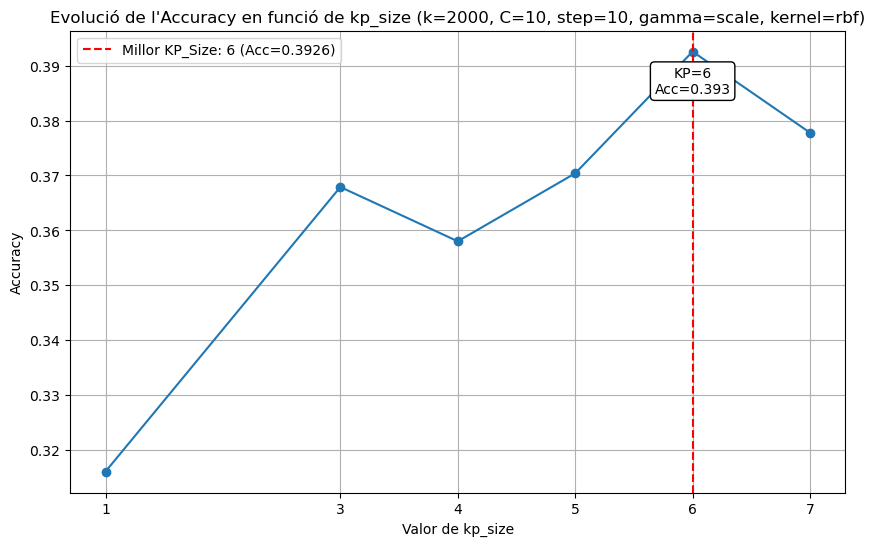

In [28]:
import re
import matplotlib.pyplot as plt
import pandas as pd

file_name = r"PROVES CORRECTES\1.GRISOS\KP_POINT\VARIA_KP_SZE_fixe_k2000_c10.0_step10_test0.3_gammascale_kernelrbf_degree3.txt"

# LECTURA DEL FITXER EN LATIN-1
try:
    with open(file_name, "r", encoding="latin-1") as f:
        content = f.read()
except FileNotFoundError:
    print(f"Error: El fitxer '{file_name}' no s'ha trobat. Revisa el path.")
    content = ""
except UnicodeDecodeError:
    print("Error: No s'ha pogut llegir el fitxer en format Latin-1.")
    content = ""

if content:
    # Extreure kp_size i Accuracy
    kp_values = re.findall(r"kp_size=([0-9]+)", content)
    accuracy_values = re.findall(r"Accuracy:\s*([0-9]*\.[0-9]+)", content)

    if not kp_values or not accuracy_values:
        print("No s'han trobat valors de 'kp_size' o d'Accuracy al fitxer!")
    else:
        # Conversió a números
        kp_values = [int(s) for s in kp_values]
        accuracy_values = [float(a) for a in accuracy_values]

        # Crear DataFrame ordenat
        df_results = pd.DataFrame({
            "KP_Size": kp_values,
            "Accuracy": accuracy_values
        }).sort_values(by="KP_Size")

        # Extreure llistes ordenades
        kp_values = df_results["KP_Size"].tolist()
        accuracy_values = df_results["Accuracy"].tolist()

        # Millor Accuracy
        best_accuracy = max(accuracy_values)
        best_kp = kp_values[accuracy_values.index(best_accuracy)]

        # Mostrar DataFrame
        print(df_results)
        print(f"\n>>> Millor valor: KP_Size = {best_kp} amb Accuracy = {best_accuracy:.4f}")

        # Gràfic
        plt.figure(figsize=(10, 6))
        plt.plot(kp_values, accuracy_values, marker='o', linestyle='-')
        plt.axvline(x=best_kp, color='r', linestyle='--',
                    label=f'Millor KP_Size: {best_kp} (Acc={best_accuracy:.4f})')

        # Etiqueta sota del millor punt
        plt.annotate(
            f"KP={best_kp}\nAcc={best_accuracy:.3f}",
            (best_kp, best_accuracy),
            textcoords="offset points",
            xytext=(0, -30),  # etiqueta cap a sota
            ha="center",
            fontsize=10,
            bbox=dict(boxstyle="round", fc="white")
        )

        plt.title('Evolució de l\'Accuracy en funció de kp_size (k=2000, C=10, step=10, gamma=scale, kernel=rbf)')
        plt.xlabel('Valor de kp_size')
        plt.ylabel('Accuracy')
        plt.grid(True)
        plt.xticks(kp_values)
        plt.legend()
        plt.show()


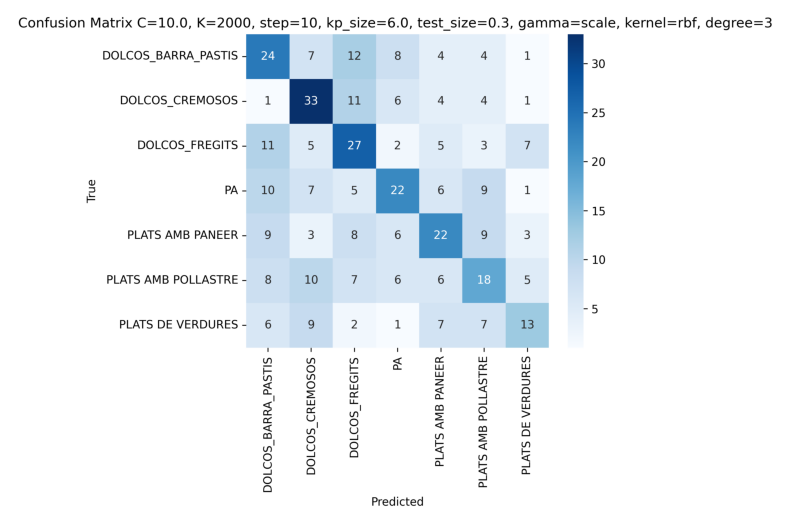

In [29]:

cm_file = r"PROVES CORRECTES\1.GRISOS\KP_POINT\confusion_matrix_C10.0_K2000_kp_size6.0.png"
if os.path.exists(cm_file):
    img = plt.imread(cm_file)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print(f"No s'ha trobat la imatge de la matriu de confusió: {cm_file}")

   Degree  Accuracy
0       1    0.3877
1       2    0.3654
2       3    0.2346
3       4    0.1975
4       5    0.1877
5       6    0.1852
6       7    0.1778
7       8    0.1778

>>> Millor valor: Degree = 1 amb Accuracy = 0.3877


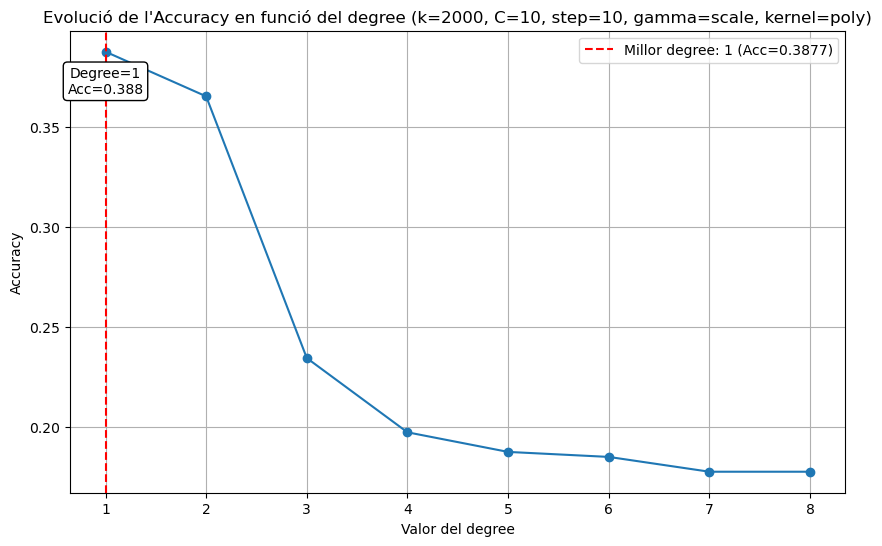

In [30]:
import re 
import matplotlib.pyplot as plt
import pandas as pd

file_name = r"PROVES CORRECTES\1.GRISOS\GRAU_POLI\VARIA_DEGREE_fixe_K2000_c10.0_step10_kp_size6.0_test0.3_gammascale_kernelpoly.txt"

# LECTURA DEL FITXER EN LATIN-1
try:
    with open(file_name, "r", encoding="latin-1") as f:
        content = f.read()
except FileNotFoundError:
    print(f"Error: El fitxer '{file_name}' no s'ha trobat. Revisa el path.")
    content = ""
except UnicodeDecodeError:
    print("Error: No s'ha pogut llegir el fitxer en format Latin-1.")
    content = ""

if content:
    # Extreure degree i Accuracy
    degree_values = re.findall(r"degree=([0-9]+)", content)
    accuracy_values = re.findall(r"Accuracy:\s*([0-9]*\.[0-9]+)", content)

    if not degree_values or not accuracy_values:
        print("No s'han trobat valors de 'degree' o d'Accuracy al fitxer!")
    else:
        # Conversió a números
        degree_values = [int(x) for x in degree_values]
        accuracy_values = [float(a) for a in accuracy_values]

        # Crear DataFrame ordenat
        df_results = pd.DataFrame({
            "Degree": degree_values,
            "Accuracy": accuracy_values
        }).sort_values(by="Degree")

        # Extreure llistes ordenades
        degree_values = df_results["Degree"].tolist()
        accuracy_values = df_results["Accuracy"].tolist()

        # Millor Accuracy
        best_accuracy = max(accuracy_values)
        best_degree = degree_values[accuracy_values.index(best_accuracy)]

        # Mostrar DataFrame ordenat
        print(df_results)
        print(f"\n>>> Millor valor: Degree = {best_degree} amb Accuracy = {best_accuracy:.4f}")

        # Gràfic
        plt.figure(figsize=(10, 6))
        plt.plot(degree_values, accuracy_values, marker='o', linestyle='-')
        plt.axvline(x=best_degree, color='r', linestyle='--',
                    label=f'Millor degree: {best_degree} (Acc={best_accuracy:.4f})')

        # Etiqueta sota del millor punt
        plt.annotate(
            f"Degree={best_degree}\nAcc={best_accuracy:.3f}",
            (best_degree, best_accuracy),
            textcoords="offset points",
            xytext=(0, -30),  # etiqueta cap a sota
            ha="center",
            fontsize=10,
            bbox=dict(boxstyle="round", fc="white")
        )

        plt.title('Evolució de l\'Accuracy en funció del degree (k=2000, C=10, step=10, gamma=scale, kernel=poly)')
        plt.xlabel('Valor del degree')
        plt.ylabel('Accuracy')
        plt.grid(True)
        plt.xticks(degree_values)
        plt.legend()
        plt.show()


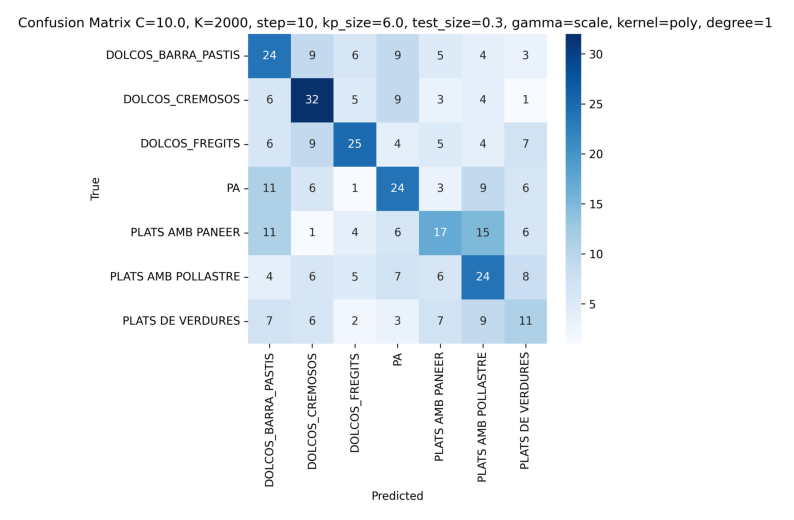

In [31]:
cm_file = r"PROVES CORRECTES\1.GRISOS\GRAU_POLI\confusion_matrix_C10.0_K2000_degree_1.png"
if os.path.exists(cm_file):
    img = plt.imread(cm_file)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print(f"No s'ha trobat la imatge de la matriu de confusió: {cm_file}")

{'poly': {'gamma': [0.1, 0.1, 0.01, 0.001, 0.0001, 'scale'], 'accuracy': [0.1111, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111]}, 'rbf': {'gamma': [0.1, 0.01, 0.001, 0.0001, 'scale'], 'accuracy': [0.1111, 0.1111, 0.1111, 0.1111, 0.1111]}}


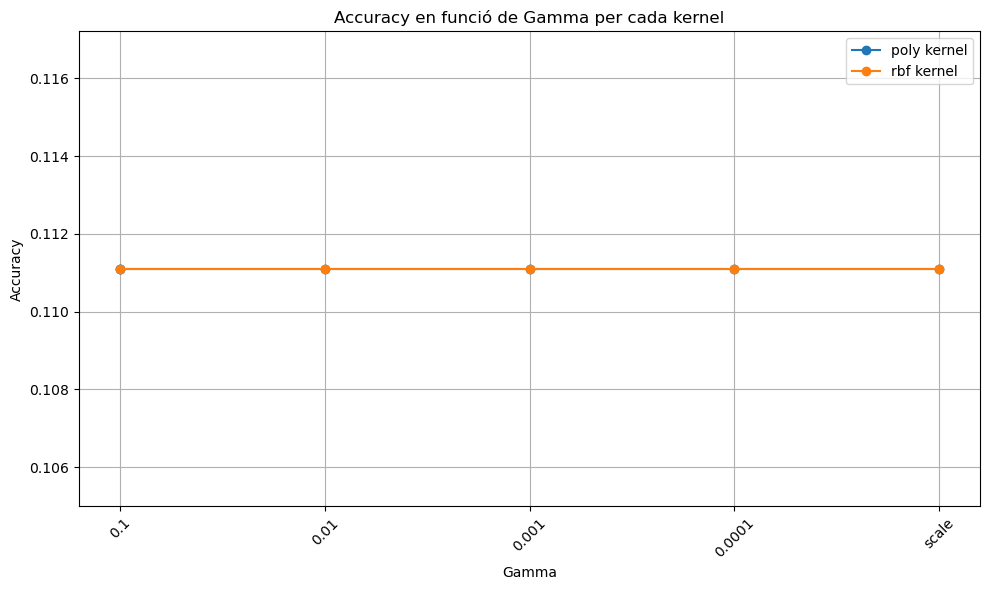

In [32]:

file_name = "PROVES CORRECTES\\1.GRISOS\\GAMMA\\VARIA_GAMMA_DEGREE_fixe_K2000_c10.0_step10_kp_size6.0_test0.3_kernelpoly.txt"  # posa el teu fitxer aquí


with open(file_name, "r", encoding="latin-1") as f:
    content = f.read()

def try_numeric(x):
    try:
        return float(x)
    except ValueError:
        return x

# Separar per les línies que comencen amb "Prova:"
proves = re.findall(r"Prova: (.+)", content)

data = {}

for prova in proves:
    # Trobar gamma i kernel dins la mateixa línia de Prova
    gamma_match = re.search(r"gamma=([^\s,]+)", prova)
    kernel_match = re.search(r"kernel=([^\s,]+)", prova)
    accuracy_match = re.search(r"Accuracy:\s*([0-9]*\.[0-9]+)", content)  # cerca a tot el text
    
    if gamma_match and kernel_match and accuracy_match:
        gamma = try_numeric(gamma_match.group(1))
        kernel = kernel_match.group(1)
        accuracy = float(accuracy_match.group(1))
        
        if kernel not in data:
            data[kernel] = {"gamma": [], "accuracy": []}
        data[kernel]["gamma"].append(gamma)
        data[kernel]["accuracy"].append(accuracy)

print(data)
# Ordenar per gamma i convertir a llistes
for kernel in data:
    df = pd.DataFrame(data[kernel])
    df = df.sort_values(by="gamma", key=lambda x: [float(i) if isinstance(i, str) and i.replace('.', '', 1).isdigit() else float('inf') for i in x])
    data[kernel]["gamma"] = df["gamma"].tolist()
    data[kernel]["accuracy"] = df["accuracy"].tolist()

# --- GRÀFIC Accuracy vs Gamma per kernel ---
plt.figure(figsize=(10,6))

for kernel_name, values in data.items():
    plt.plot(values["gamma"], values["accuracy"], marker='o', linestyle='-', label=f'{kernel_name} kernel')

plt.xlabel("Gamma")
plt.ylabel("Accuracy")
plt.title("Accuracy en funció de Gamma per cada kernel")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

    Kernel  Accuracy
2  linear,    0.1210
0    poly,    0.3877
1     rbf,    0.3901

>>> Millor kernel = rbf, amb Accuracy = 0.3901


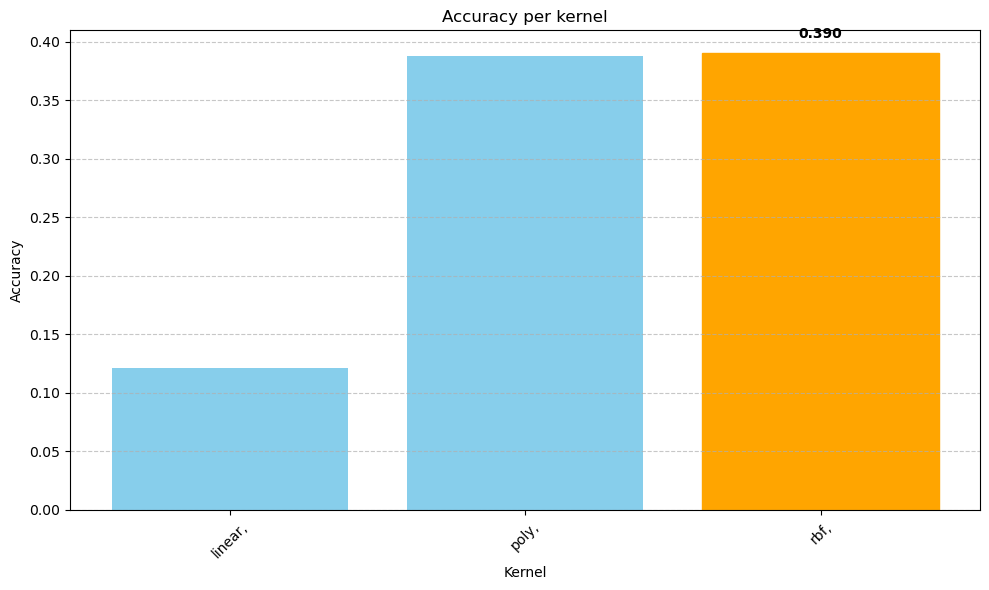

In [33]:
import re
import matplotlib.pyplot as plt
import pandas as pd

file_name = r"PROVES CORRECTES\1.GRISOS\KERNEL\VARIA_KERNEL_fixe_K2000_c10.0_step10_kp_size6.0_test0.3_.txt"

# Lectura del fitxer
with open(file_name, "r", encoding="latin-1") as f:
    content = f.read()

def try_numeric(x):
    try:
        return float(x)
    except ValueError:
        return x

if content:
    # Extreure kernel i Accuracy
    kernel_values_raw = re.findall(r"kernel=([^\s]+)", content)
    accuracy_values = re.findall(r"Accuracy:\s*([0-9]*\.[0-9]+)", content)

    if not kernel_values_raw or not accuracy_values:
        print("No s'han trobat valors de 'kernel' o d'Accuracy al fitxer!")
    else:
        kernel_values = [try_numeric(x) for x in kernel_values_raw]
        accuracy_values = [float(a) for a in accuracy_values]

        # Crear DataFrame
        df_results = pd.DataFrame({
            "Kernel": kernel_values,
            "Accuracy": accuracy_values
        })

        # Ordenar per kernel (si és numèric o no)
        df_results["is_numeric"] = df_results["Kernel"].apply(lambda x: isinstance(x, (int, float)))
        df_results = df_results.sort_values(
            by=["is_numeric", "Kernel"],
            ascending=[False, True]
        ).drop(columns=["is_numeric"])

        kernel_values = df_results["Kernel"].tolist()
        accuracy_values = df_results["Accuracy"].tolist()

        # Millor Accuracy
        best_accuracy = max(accuracy_values)
        best_kernel = kernel_values[accuracy_values.index(best_accuracy)]

        print(df_results)
        print(f"\n>>> Millor kernel = {best_kernel} amb Accuracy = {best_accuracy:.4f}")

        # Gràfic de barres
        plt.figure(figsize=(10, 6))
        bars = plt.bar(kernel_values, accuracy_values, color='skyblue')
        
        # Ressaltar la barra del millor kernel
        best_index = kernel_values.index(best_kernel)
        bars[best_index].set_color('orange')

        # Etiqueta damunt de la millor barra
        plt.text(best_index, best_accuracy + 0.01,
                 f"{best_accuracy:.3f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

        plt.title('Accuracy per kernel')
        plt.xlabel('Kernel')
        plt.ylabel('Accuracy')
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()


Color

Numero de fotos disminuit

Dades extretes: [(0, 0.5481), (10, 0.4907), (20, 0.4774), (40, 0.3827)]


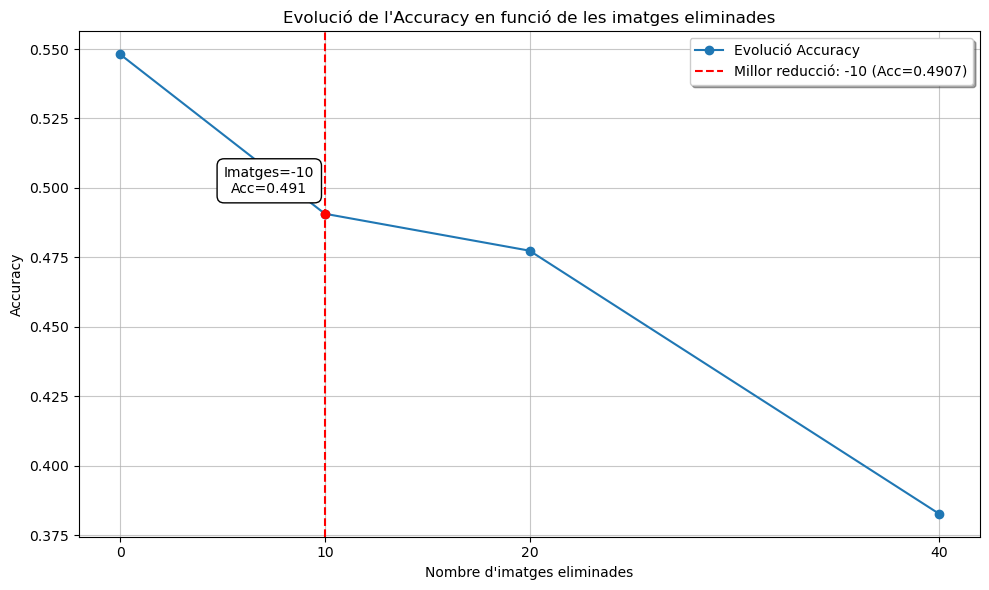

In [34]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import io

# --------------------------------------------------------------------
# 1) CARREGAR EL TXT
# --------------------------------------------------------------------
# Assegura't que la ruta és correcta
file_path = r'PROVES CORRECTES\3.NUMERO DE FOTOS DISMINUIT\Proves variació quantitat.txt'

with open(file_path, "r", encoding="latin-1") as f:
    lines = f.readlines()

# --------------------------------------------------------------------
# 2) EXTREURE DADES (Mètode Robust)
# --------------------------------------------------------------------
removed_images = []
accuracy_values = []
matrices_dict = {}

current_x = None
current_acc = None
reading_matrix = False
matrix_lines = []

for line in lines:
    line = line.strip()
    if not line: continue

    # --- A. DETECTAR EL TÍTOL DE LA PROVA ---
    if "Prova" in line and "Accuracy" not in line:
        # Guardem matriu anterior si existeix
        if current_acc is not None and matrix_lines:
            try:
                mat_str = "\n".join(matrix_lines)
                df_cm = pd.read_csv(io.StringIO(mat_str), sep=r'\s+', engine='python')
                matrices_dict[current_acc] = df_cm
            except: pass
        
        # Reset
        reading_matrix = False
        matrix_lines = []
        current_acc = None
        
        if "SENSE ELIMINAR" in line:
            current_x = 0
        elif "Prova -" in line:
            match = re.search(r'Prova -(\d+)', line)
            if match:
                current_x = int(match.group(1))
            else:
                current_x = None

    # --- B. DETECTAR ACCURACY ---
    elif "Accuracy:" in line:
        match = re.search(r'Accuracy:\s*([0-9.]+)', line)
        if match and current_x is not None:
            acc = float(match.group(1))
            current_acc = acc
            removed_images.append(current_x)
            accuracy_values.append(acc)

    # --- C. LLEGIR MATRIU ---
    elif "Matriu de confusió:" in line:
        reading_matrix = True
        continue
    elif reading_matrix:
        if "=====" in line:
            reading_matrix = False
        else:
            matrix_lines.append(line)

# Guardar l'última matriu pendent
if current_acc is not None and matrix_lines:
    try:
        mat_str = "\n".join(matrix_lines)
        df_cm = pd.read_csv(io.StringIO(mat_str), sep=r'\s+', engine='python')
        matrices_dict[current_acc] = df_cm
    except: pass

print(f"Dades extretes: {list(zip(removed_images, accuracy_values))}")

# --------------------------------------------------------------------
# 3) PREPARAR DADES
# --------------------------------------------------------------------
if not removed_images:
    print("ERROR: No s'han trobat dades.")
else:
    df = pd.DataFrame({'x': removed_images, 'y': accuracy_values})
    df = df.sort_values('x')

    X_sorted = df['x'].tolist()
    Y_sorted = df['y'].tolist()

    # --------------------------------------------------------------------
    # 4) TROBAR EL MILLOR VALOR (Excloent 0)
    # --------------------------------------------------------------------
    df_filtered = df[df['x'] > 0]
    
    best_x = None
    best_y = None
    
    if not df_filtered.empty:
        best_row = df_filtered.loc[df_filtered['y'].idxmax()]
        best_x = int(best_row['x'])
        best_y = best_row['y']

    # --------------------------------------------------------------------
    # 5) GRÀFICA ESTIL "TARGET"
    # --------------------------------------------------------------------
    plt.figure(figsize=(10, 6))

    # Línia Principal (Blava amb cercles)
    plt.plot(X_sorted, Y_sorted, marker='o', linestyle='-', color='#1f77b4', label='Evolució Accuracy')

    if best_x is not None:
        # A. Línia Vermella Discontínua (Vertical completa)
        label_line = f"Millor reducció: -{best_x} (Acc={best_y:.4f})"
        plt.axvline(x=best_x, color='red', linestyle='--', linewidth=1.5, label=label_line)

        # B. Etiqueta (Box) Estil "Negre/Blanc"
        # Ajustem xytext per moure la caixa una mica a l'esquerra/dalt del punt
        plt.annotate(
            f"Imatges=-{best_x}\nAcc={best_y:.3f}",
            xy=(best_x, best_y),
            xytext=(-40, 15),       # Desplaçament (píxels) respecte al punt
            textcoords='offset points',
            bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="black", alpha=1.0), # Vora negra, fons blanc
            ha='center',
            fontsize=10,
            color='black'
        )
        
        # Opcional: Ressaltar el punt guanyador amb un altre color a sobre
        plt.plot(best_x, best_y, marker='o', color='red', markersize=6)

    # Configuració general
    plt.title("Evolució de l'Accuracy en funció de les imatges eliminades", fontsize=12)
    plt.xlabel("Nombre d'imatges eliminades", fontsize=10)
    plt.ylabel("Accuracy", fontsize=10)
    plt.grid(True, alpha=0.7) # Graella de fons
    plt.xticks(X_sorted)      # Assegurar que surten tots els steps a l'eix X
    
    # Llegenda a dalt a la dreta
    plt.legend(loc='upper right', frameon=True, fancybox=True, framealpha=1, shadow=True)
    
    plt.tight_layout()
    plt.show()

   

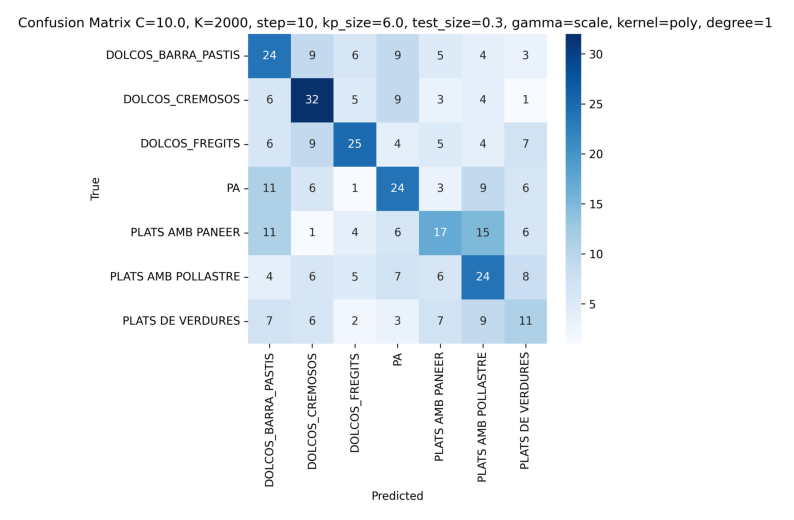

In [35]:


file_path = r'PROVES CORRECTES\3.NUMERO DE FOTOS DISMINUIT\Confusion Matrix Color C=100.0, K=500, step=10, kp_size=2.0.png'

if os.path.exists(cm_file):
    img = plt.imread(cm_file)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print(f"No s'ha trobat la imatge de la matriu de confusió: {cm_file}")

Augment 

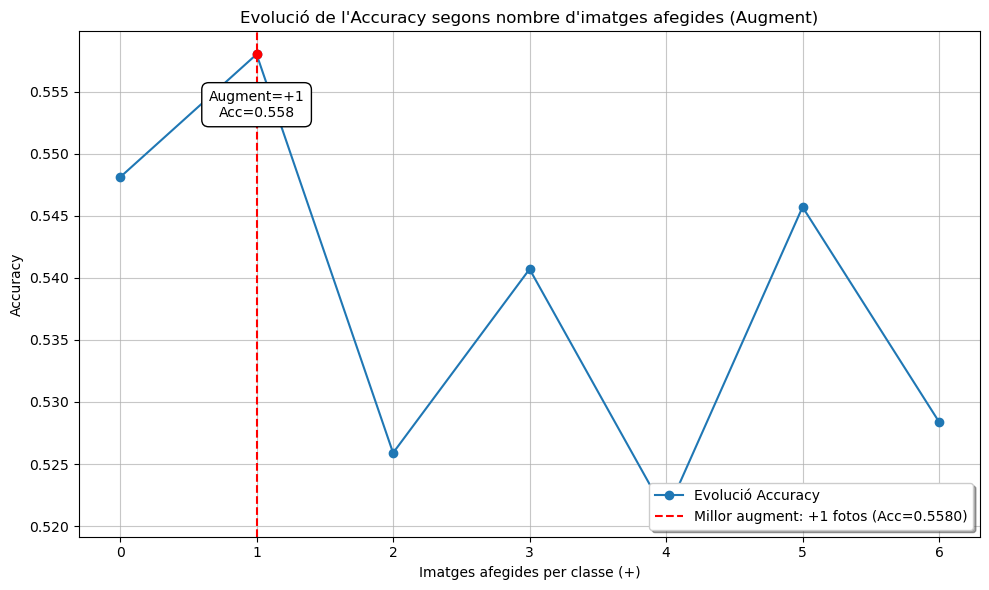

In [36]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import io

# --------------------------------------------------------------------
# 1) CONFIGURACIÓ
# --------------------------------------------------------------------
file_path = r'PROVES CORRECTES\4.AUGMENT\Augment balancejat.txt'

with open(file_path, "r", encoding="latin-1") as f:
    lines = f.readlines()

# --------------------------------------------------------------------
# 2) EXTREURE DADES
# --------------------------------------------------------------------
x_values = []
accuracy_values = []
matrices_dict = {}

current_x = None
current_acc = None
reading_matrix = False
matrix_lines = []

for line in lines:
    line = line.strip()
    if not line: continue

    # A. Títol
    if "Prova" in line and "Accuracy" not in line:
        if current_acc is not None and matrix_lines:
            try:
                mat_str = "\n".join(matrix_lines)
                df_cm = pd.read_csv(io.StringIO(mat_str), sep=r'\s+', engine='python')
                matrices_dict[current_acc] = df_cm
            except: pass
        
        reading_matrix = False
        matrix_lines = []
        current_acc = None
        
        if "SENSE AUGMENT" in line:
            current_x = 0
        elif "Prova Augment" in line:
            match = re.search(r'Prova Augment (\d+)', line)
            if match:
                current_x = int(match.group(1))
            else:
                current_x = None

    # B. Accuracy
    elif "Accuracy:" in line:
        match = re.search(r'Accuracy:\s*([0-9.]+)', line)
        if match and current_x is not None:
            acc = float(match.group(1))
            current_acc = acc
            x_values.append(current_x)
            accuracy_values.append(acc)

    # C. Matriu
    elif "Matriu de confusió:" in line:
        reading_matrix = True
        continue
    elif reading_matrix:
        if "=====" in line:
            reading_matrix = False
        else:
            matrix_lines.append(line)

if current_acc is not None and matrix_lines:
    try:
        mat_str = "\n".join(matrix_lines)
        df_cm = pd.read_csv(io.StringIO(mat_str), sep=r'\s+', engine='python')
        matrices_dict[current_acc] = df_cm
    except: pass

# --------------------------------------------------------------------
# 3) GRÀFICA
# --------------------------------------------------------------------
if not x_values:
    print("ERROR: No s'han trobat dades.")
else:
    df = pd.DataFrame({'x': x_values, 'y': accuracy_values})
    df = df.sort_values('x')

    X_sorted = df['x'].tolist()
    Y_sorted = df['y'].tolist()

    # Busquem el millor augment (>0)
    df_filtered = df[df['x'] > 0]
    best_x = None
    best_y = None
    if not df_filtered.empty:
        best_row = df_filtered.loc[df_filtered['y'].idxmax()]
        best_x = int(best_row['x'])
        best_y = best_row['y']

    plt.figure(figsize=(10, 6))

    # Línia Principal
    plt.plot(X_sorted, Y_sorted, marker='o', linestyle='-', color='#1f77b4', label='Evolució Accuracy')

    if best_x is not None:
        # Línia vermella
        label_line = f"Millor augment: +{best_x} fotos (Acc={best_y:.4f})"
        plt.axvline(x=best_x, color='red', linestyle='--', linewidth=1.5, label=label_line)

        # --- CANVI AQUÍ ---
        # Hem canviat xytext a (0, -45) per moure l'etiqueta A SOTA del punt
        plt.annotate(
            f"Augment=+{best_x}\nAcc={best_y:.3f}",
            xy=(best_x, best_y),
            xytext=(0, -45),         # <--- Això la baixa cap avall
            textcoords='offset points',
            bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="black", alpha=1.0),
            ha='center',
            fontsize=10,
            color='black'
        )
        
        plt.plot(best_x, best_y, marker='o', color='red', markersize=6)

    plt.title("Evolució de l'Accuracy segons nombre d'imatges afegides (Augment)", fontsize=12)
    plt.xlabel("Imatges afegides per classe (+)", fontsize=10)
    plt.ylabel("Accuracy", fontsize=10)
    plt.grid(True, alpha=0.7)
    plt.xticks(X_sorted)
    plt.legend(loc='lower right', frameon=True, fancybox=True, framealpha=1, shadow=True)
    
    plt.tight_layout()
    plt.show()

   

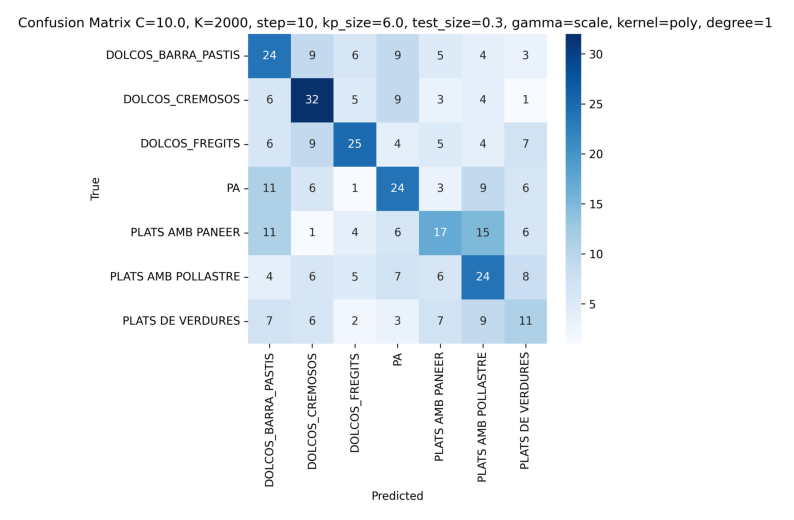

In [37]:


file_path = r'PROVES CORRECTES\4.AUGMENT\Confusion Matrix Color Augment 1.png'

if os.path.exists(cm_file):
    img = plt.imread(cm_file)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print(f"No s'ha trobat la imatge de la matriu de confusió: {cm_file}")

Comparacions DOS a DOS

        C  Accuracy  Precision  Recall      F1
0    0.01    0.5583     0.6199  0.5583  0.4933
1    0.10    0.5583     0.6199  0.5583  0.4933
2    1.00    0.6667     0.6736  0.6667  0.6633
3   10.00    0.6750     0.6750  0.6750  0.6750
4  100.00    0.6583     0.6584  0.6583  0.6583


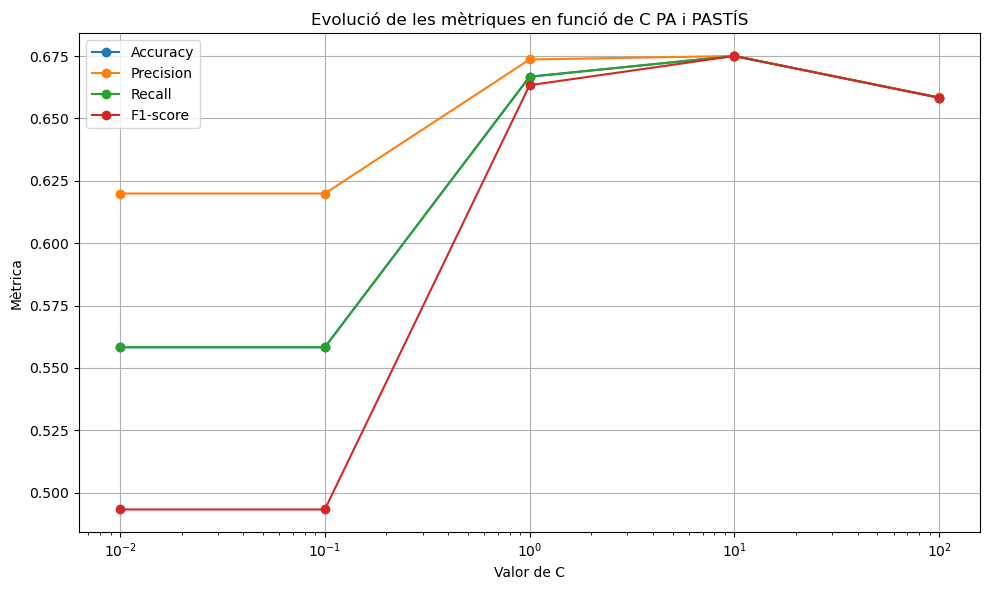

In [38]:
#PA i PASTÍS

file_name = "PROVES CORRECTES\\5.COMPARACIÓ DOS A DOS\\PA i PASTÍS\\proves_pa_pastis.txt"   # << posa aquí el teu fitxer

with open(file_name, "r", encoding="latin-1") as f:
    content = f.read()

# Regex per extreure dades
C_vals      = re.findall(r"C\s*=\s*([0-9.]+)", content)
Accuracy    = re.findall(r"Accuracy:\s*([0-9]*\.[0-9]+)", content)
Precision   = re.findall(r"Precision:\s*([0-9]*\.[0-9]+)", content)
Recall      = re.findall(r"Recall:\s*([0-9]*\.[0-9]+)", content)
F1          = re.findall(r"F1-score:\s*([0-9]*\.[0-9]+)", content)

# Converteix a float
C_vals    = [float(c) for c in C_vals]
Accuracy  = [float(a) for a in Accuracy]
Precision = [float(p) for p in Precision]
Recall    = [float(r) for r in Recall]
F1        = [float(f) for f in F1]

# Crear dataframe per control
df = pd.DataFrame({
    "C": C_vals,
    "Accuracy": Accuracy,
    "Precision": Precision,
    "Recall": Recall,
    "F1": F1
}).sort_values(by="C")

print(df)

# --- GRÀFIC ---
plt.figure(figsize=(10,6))


plt.plot(df["C"], df["Accuracy"], marker="o", label="Accuracy")
plt.plot(df["C"], df["Precision"], marker="o", label="Precision")
plt.plot(df["C"], df["Recall"], marker="o", label="Recall")
plt.plot(df["C"], df["F1"], marker="o", label="F1-score")

plt.xscale("log")  # Escala log per C si vols (treu aquesta línia si no)
plt.xlabel("Valor de C")
plt.ylabel("Mètrica")
plt.title("Evolució de les mètriques en funció de C PA i PASTÍS")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



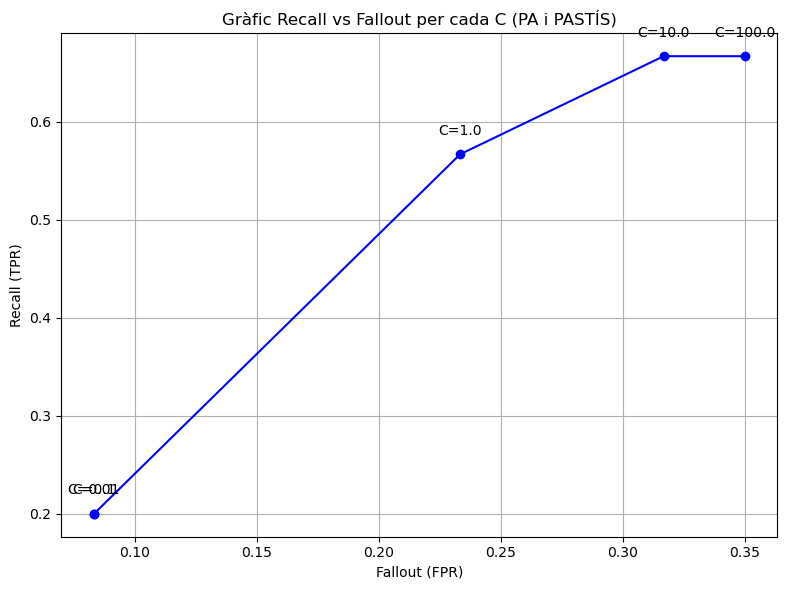

In [39]:

file_name = "PROVES CORRECTES\\5.COMPARACIÓ DOS A DOS\\PA i PASTÍS\\proves_pa_pastis.txt"

with open(file_name, "r", encoding="latin-1") as f:
    content = f.read().strip()

# Separar blocs per cada C
proves = content.split("C =")

recall_vals = []
fallout_vals = []
C_vals = []

for prova in proves[1:]:  # Ignorar el primer split buit
    # Extraure C
    c_match = re.match(r'\s*([0-9.]+)', prova)
    if c_match:
        C_vals.append(float(c_match.group(1)))
    
    # Extraure matriu de confusió 2x2
    matriu_lines = re.findall(r'(\d+\s+\d+)', prova)
    if len(matriu_lines) >= 2:
        # TP, FN, FP, TN
        tp, fn = map(int, matriu_lines[0].split())
        fp, tn = map(int, matriu_lines[1].split())
        
        # Calcul Recall (TPR) i Fallout (FPR)
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        fallout = fp / (fp + tn) if (fp + tn) > 0 else 0
        
        recall_vals.append(recall)
        fallout_vals.append(fallout)

# --- GRÀFIC RECALL vs FALLOUT ---
plt.figure(figsize=(8,6))
plt.plot(fallout_vals, recall_vals, marker='o', linestyle='-', color='b')
for i, c in enumerate(C_vals):
    plt.text(fallout_vals[i], recall_vals[i]+0.02, f'C={c}', ha='center')

plt.xlabel("Fallout (FPR)")
plt.ylabel("Recall (TPR)")
plt.title("Gràfic Recall vs Fallout per cada C (PA i PASTÍS)")
plt.grid(True)
plt.tight_layout()
plt.show()


[0.01, 0.1, 1.0, 10.0, 100.0]
        C  Accuracy  Precision  Recall      F1
0    0.01    0.5714     0.3265  0.5714  0.4156
1    0.10    0.4571     0.7605  0.4571  0.3168
2    1.00    0.7810     0.7805  0.7810  0.7789
3   10.00    0.7905     0.7909  0.7905  0.7880
4  100.00    0.7905     0.7909  0.7905  0.7880


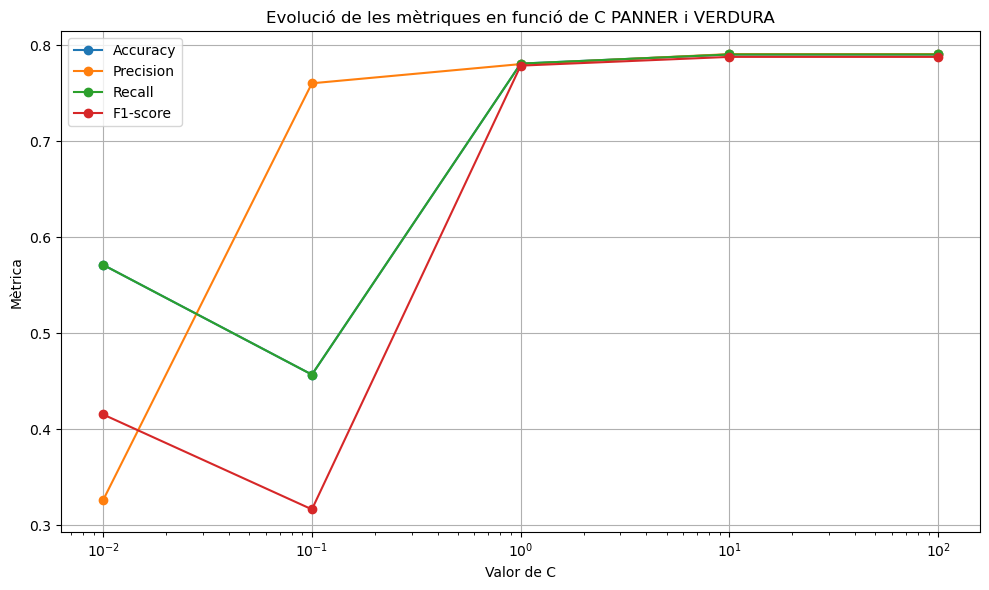

In [40]:
#PANNER i VERDURA

file_name = "PROVES CORRECTES\\5.COMPARACIÓ DOS A DOS\\PANEER i VERDURA\\proves_panner_verdura.txt"   # << posa aquí el teu fitxer

with open(file_name, "r", encoding="latin-1") as f:
    content = f.read()

# Regex per extreure dades
C_vals      = re.findall(r"C\s*=\s*([0-9.]+)", content)
Accuracy    = re.findall(r"Accuracy:\s*([0-9]*\.[0-9]+)", content)
Precision   = re.findall(r"Precision:\s*([0-9]*\.[0-9]+)", content)
Recall      = re.findall(r"Recall:\s*([0-9]*\.[0-9]+)", content)
F1          = re.findall(r"F1-score:\s*([0-9]*\.[0-9]+)", content)

# Converteix a float
C_vals    = [float(c) for c in C_vals]
Accuracy  = [float(a) for a in Accuracy]
Precision = [float(p) for p in Precision]
Recall    = [float(r) for r in Recall]
F1        = [float(f) for f in F1]

print(C_vals)


# Crear dataframe per control
df = pd.DataFrame({
    "C": C_vals,
    "Accuracy": Accuracy,
    "Precision": Precision,
    "Recall": Recall,
    "F1": F1
}).sort_values(by="C")

print(df)

# --- GRÀFIC ---
plt.figure(figsize=(10,6))

plt.plot(df["C"], df["Accuracy"], marker="o", label="Accuracy")
plt.plot(df["C"], df["Precision"], marker="o", label="Precision")
plt.plot(df["C"], df["Recall"], marker="o", label="Recall")
plt.plot(df["C"], df["F1"], marker="o", label="F1-score")

plt.xscale("log")  # Escala log per C si vols (treu aquesta línia si no)
plt.xlabel("Valor de C")
plt.ylabel("Mètrica")
plt.title("Evolució de les mètriques en funció de C PANNER i VERDURA")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



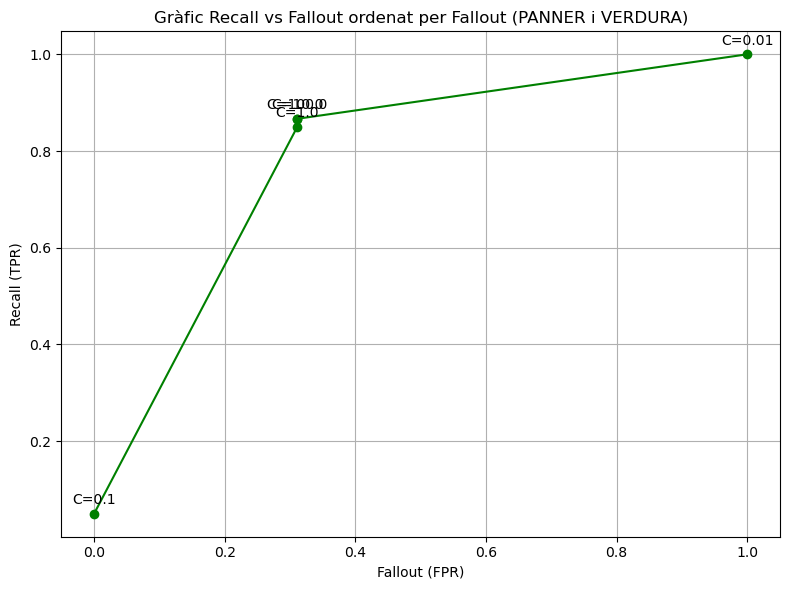

In [41]:
file_name = "PROVES CORRECTES\\5.COMPARACIÓ DOS A DOS\\PANEER i VERDURA\\proves_panner_verdura.txt"

with open(file_name, "r", encoding="latin-1") as f:
    content = f.read().strip()

# Separar blocs per cada C
proves = content.split("C =")

recall_vals = []
fallout_vals = []
C_vals = []

for prova in proves[1:]:  # Ignorar el primer split buit
    # Extraure C
    c_match = re.match(r'\s*([0-9.]+)', prova)
    if c_match:
        c_val = float(c_match.group(1))
        # Extraure matriu de confusió 2x2
        matriu_lines = re.findall(r'(\d+\s+\d+)', prova)
        if len(matriu_lines) >= 2:
            tp, fn = map(int, matriu_lines[0].split())
            fp, tn = map(int, matriu_lines[1].split())
            
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            fallout = fp / (fp + tn) if (fp + tn) > 0 else 0
            
            C_vals.append(c_val)
            recall_vals.append(recall)
            fallout_vals.append(fallout)

# Ordenar segons fallout
sorted_data = sorted(zip(fallout_vals, recall_vals, C_vals), key=lambda x: x[0])
fallout_vals, recall_vals, C_vals = zip(*sorted_data)

# --- GRÀFIC RECALL vs FALLOUT ---
plt.figure(figsize=(8,6))
plt.plot(fallout_vals, recall_vals, marker='o', linestyle='-', color='g')
for i, c in enumerate(C_vals):
    plt.text(fallout_vals[i], recall_vals[i]+0.02, f'C={c}', ha='center')

plt.xlabel("Fallout (FPR)")
plt.ylabel("Recall (TPR)")
plt.title("Gràfic Recall vs Fallout ordenat per Fallout (PANNER i VERDURA)")
plt.grid(True)
plt.tight_layout()
plt.show()

[0.01, 0.1, 1.0, 10.0, 100.0]
        C  Accuracy  Precision  Recall      F1
0    0.01    0.6917     0.7247  0.6917  0.6799
1    0.10    0.6917     0.7247  0.6917  0.6799
2    1.00    0.7750     0.7751  0.7750  0.7750
3   10.00    0.7917     0.7917  0.7917  0.7917
4  100.00    0.7917     0.7917  0.7917  0.7917


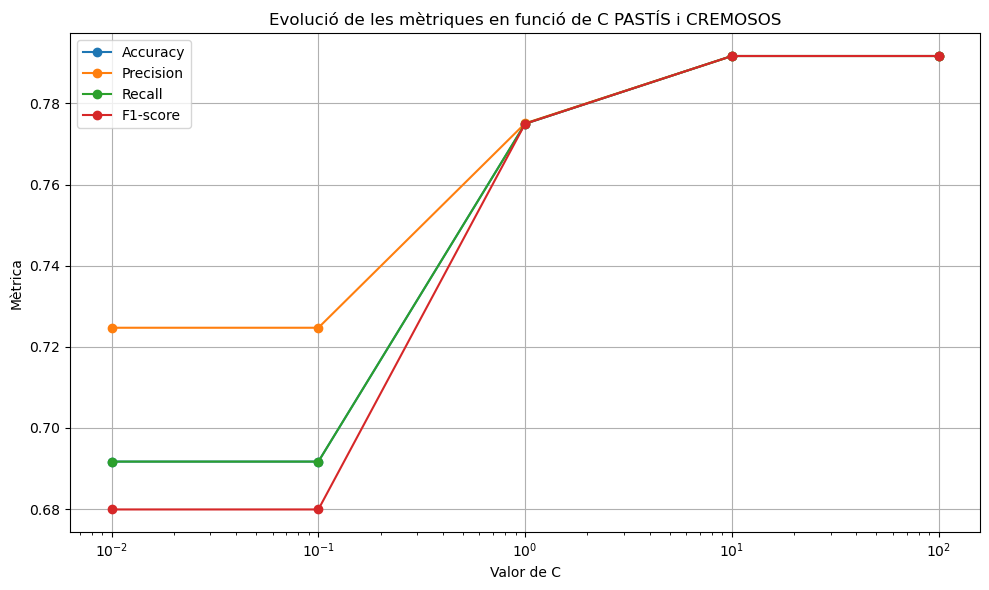

In [42]:
#PASTIS I CREMOS


file_name = "PROVES CORRECTES\\5.COMPARACIÓ DOS A DOS\\PASTÍS i CREMOS\\proves_pastis_cremosos.txt"   # << posa aquí el teu fitxer

with open(file_name, "r", encoding="latin-1") as f:
    content = f.read()

# Regex per extreure dades
C_vals      = re.findall(r"C\s*=\s*([0-9.]+)", content)
Accuracy    = re.findall(r"Accuracy:\s*([0-9]*\.[0-9]+)", content)
Precision   = re.findall(r"Precision:\s*([0-9]*\.[0-9]+)", content)
Recall      = re.findall(r"Recall:\s*([0-9]*\.[0-9]+)", content)
F1          = re.findall(r"F1-score:\s*([0-9]*\.[0-9]+)", content)

# Converteix a float
C_vals    = [float(c) for c in C_vals]
Accuracy  = [float(a) for a in Accuracy]
Precision = [float(p) for p in Precision]
Recall    = [float(r) for r in Recall]
F1        = [float(f) for f in F1]

print(C_vals)


# Crear dataframe per control
df = pd.DataFrame({
    "C": C_vals,
    "Accuracy": Accuracy,
    "Precision": Precision,
    "Recall": Recall,
    "F1": F1
}).sort_values(by="C")

print(df)

# --- GRÀFIC ---
plt.figure(figsize=(10,6))

plt.plot(df["C"], df["Accuracy"], marker="o", label="Accuracy")
plt.plot(df["C"], df["Precision"], marker="o", label="Precision")
plt.plot(df["C"], df["Recall"], marker="o", label="Recall")
plt.plot(df["C"], df["F1"], marker="o", label="F1-score")

plt.xscale("log")  # Escala log per C si vols (treu aquesta línia si no)
plt.xlabel("Valor de C")
plt.ylabel("Mètrica")
plt.title("Evolució de les mètriques en funció de C PASTÍS i CREMOSOS")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



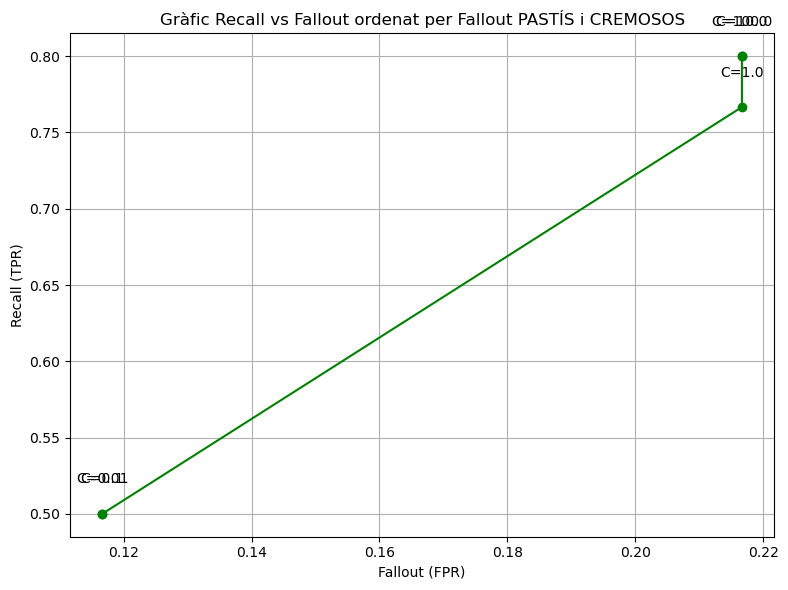

In [43]:
file_name = "PROVES CORRECTES\\5.COMPARACIÓ DOS A DOS\\PASTÍS i CREMOS\\proves_pastis_cremosos.txt"   # << posa aquí el teu fitxer


with open(file_name, "r", encoding="latin-1") as f:
    content = f.read().strip()

# Separar blocs per cada C
proves = content.split("C =")

recall_vals = []
fallout_vals = []
C_vals = []

for prova in proves[1:]:  # Ignorar el primer split buit
    # Extraure C
    c_match = re.match(r'\s*([0-9.]+)', prova)
    if c_match:
        c_val = float(c_match.group(1))
        # Extraure matriu de confusió 2x2
        matriu_lines = re.findall(r'(\d+\s+\d+)', prova)
        if len(matriu_lines) >= 2:
            tp, fn = map(int, matriu_lines[0].split())
            fp, tn = map(int, matriu_lines[1].split())
            
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            fallout = fp / (fp + tn) if (fp + tn) > 0 else 0
            
            C_vals.append(c_val)
            recall_vals.append(recall)
            fallout_vals.append(fallout)

# Ordenar segons fallout
sorted_data = sorted(zip(fallout_vals, recall_vals, C_vals), key=lambda x: x[0])
fallout_vals, recall_vals, C_vals = zip(*sorted_data)

# --- GRÀFIC RECALL vs FALLOUT ---
plt.figure(figsize=(8,6))
plt.plot(fallout_vals, recall_vals, marker='o', linestyle='-', color='g')
for i, c in enumerate(C_vals):
    plt.text(fallout_vals[i], recall_vals[i]+0.02, f'C={c}', ha='center')

plt.xlabel("Fallout (FPR)")
plt.ylabel("Recall (TPR)")
plt.title("Gràfic Recall vs Fallout ordenat per Fallout PASTÍS i CREMOSOS")
plt.grid(True)
plt.tight_layout()
plt.show()

[0.01, 0.1, 1.0, 10.0, 100.0]
        C  Accuracy  Precision  Recall      F1
0    0.01    0.8083     0.8091  0.8083  0.8082
1    0.10    0.8083     0.8091  0.8083  0.8082
2    1.00    0.7917     0.7917  0.7917  0.7917
3   10.00    0.7750     0.7788  0.7750  0.7742
4  100.00    0.7750     0.7788  0.7750  0.7742


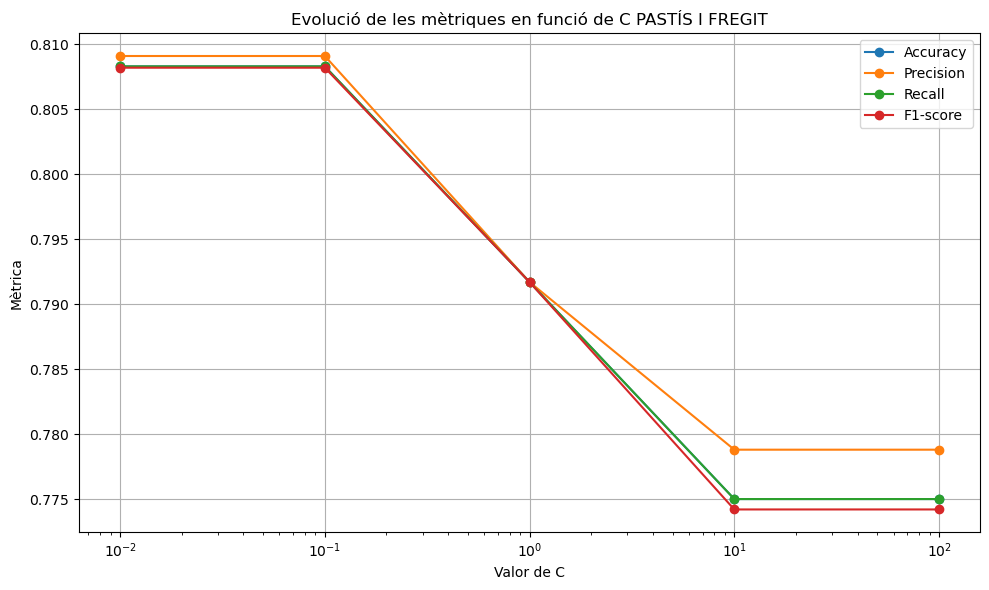

In [44]:
#PASTIS I FREGIT

file_name = "PROVES CORRECTES\\5.COMPARACIÓ DOS A DOS\\PASTÍS i FREGIT\\proves_pastis_fregit.txt"   # << posa aquí el teu fitxer

with open(file_name, "r", encoding="latin-1") as f:
    content = f.read()

# Regex per extreure dades
C_vals      = re.findall(r"C\s*=\s*([0-9.]+)", content)
Accuracy    = re.findall(r"Accuracy:\s*([0-9]*\.[0-9]+)", content)
Precision   = re.findall(r"Precision:\s*([0-9]*\.[0-9]+)", content)
Recall      = re.findall(r"Recall:\s*([0-9]*\.[0-9]+)", content)
F1          = re.findall(r"F1-score:\s*([0-9]*\.[0-9]+)", content)

# Converteix a float
C_vals    = [float(c) for c in C_vals]
Accuracy  = [float(a) for a in Accuracy]
Precision = [float(p) for p in Precision]
Recall    = [float(r) for r in Recall]
F1        = [float(f) for f in F1]

print(C_vals)


# Crear dataframe per control
df = pd.DataFrame({
    "C": C_vals,
    "Accuracy": Accuracy,
    "Precision": Precision,
    "Recall": Recall,
    "F1": F1
}).sort_values(by="C")

print(df)

# --- GRÀFIC ---
plt.figure(figsize=(10,6))

plt.plot(df["C"], df["Accuracy"], marker="o", label="Accuracy")
plt.plot(df["C"], df["Precision"], marker="o", label="Precision")
plt.plot(df["C"], df["Recall"], marker="o", label="Recall")
plt.plot(df["C"], df["F1"], marker="o", label="F1-score")

plt.xscale("log")  # Escala log per C si vols (treu aquesta línia si no)
plt.xlabel("Valor de C")
plt.ylabel("Mètrica")
plt.title("Evolució de les mètriques en funció de C PASTÍS I FREGIT")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



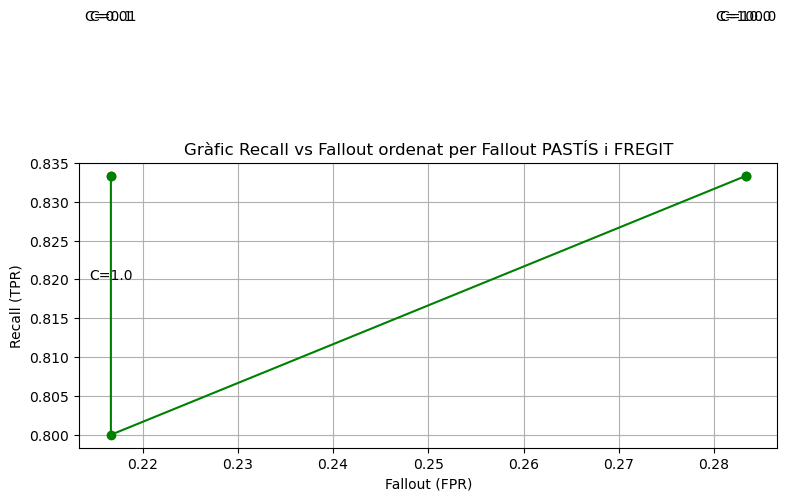

In [45]:
file_name = "PROVES CORRECTES\\5.COMPARACIÓ DOS A DOS\\PASTÍS i FREGIT\\proves_pastis_fregit.txt"   # << posa aquí el teu fitxer

with open(file_name, "r", encoding="latin-1") as f:
    content = f.read().strip()

# Separar blocs per cada C
proves = content.split("C =")

recall_vals = []
fallout_vals = []
C_vals = []

for prova in proves[1:]:  # Ignorar el primer split buit
    # Extraure C
    c_match = re.match(r'\s*([0-9.]+)', prova)
    if c_match:
        c_val = float(c_match.group(1))
        # Extraure matriu de confusió 2x2
        matriu_lines = re.findall(r'(\d+\s+\d+)', prova)
        if len(matriu_lines) >= 2:
            tp, fn = map(int, matriu_lines[0].split())
            fp, tn = map(int, matriu_lines[1].split())
            
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            fallout = fp / (fp + tn) if (fp + tn) > 0 else 0
            
            C_vals.append(c_val)
            recall_vals.append(recall)
            fallout_vals.append(fallout)

# Ordenar segons fallout
sorted_data = sorted(zip(fallout_vals, recall_vals, C_vals), key=lambda x: x[0])
fallout_vals, recall_vals, C_vals = zip(*sorted_data)

# --- GRÀFIC RECALL vs FALLOUT ---
plt.figure(figsize=(8,6))
plt.plot(fallout_vals, recall_vals, marker='o', linestyle='-', color='g')
for i, c in enumerate(C_vals):
    plt.text(fallout_vals[i], recall_vals[i]+0.02, f'C={c}', ha='center')

plt.xlabel("Fallout (FPR)")
plt.ylabel("Recall (TPR)")
plt.title("Gràfic Recall vs Fallout ordenat per Fallout PASTÍS i FREGIT")
plt.grid(True)
plt.tight_layout()
plt.show()